In [81]:
#importing necessary libraries
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [82]:
# Loading the dataset
data = pd.read_csv('/content/sample_data/judg.csv', encoding='latin1')

In [83]:
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [84]:
# Droping the unwanted column
data = data.drop(columns=['emotion_in_tweet_is_directed_at'], errors='ignore')

In [54]:
data.head()

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [55]:
data['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

,count
is_there_an_emotion_directed_at_a_brand_or_product,
No emotion toward brand or product,5389
Positive emotion,2978
Negative emotion,570
I can't tell,156


In [85]:
# Preprocessing dataset
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lower case
    return text

In [86]:
#converting to string as it is in object type
data['tweet_text']= data['tweet_text'].astype(str)

In [87]:
data['tweet_text'] = data['tweet_text'].apply(clean_text)


In [88]:
def custom_encoder(df):
  df.replace(to_replace="Positive emotion", value=1, inplace=True)
  df.replace(to_replace="Negative emotion", value=0, inplace=True)

  return df

In [89]:
data['is_there_an_emotion_directed_at_a_brand_or_product'] = custom_encoder(data['is_there_an_emotion_directed_at_a_brand_or_product'])

In [90]:
data.head()

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,i have a g iphone after hrs tweeting at rise...,0
1,know about awesome ipadiphone app that youl...,1
2,can not wait for ipad also they should sale ...,1
3,i hope this years festival isnt as crashy as ...,0
4,great stuff on fri sxsw marissa mayer google ...,1


In [91]:
# Split dataset
X = data['tweet_text']
y = data['is_there_an_emotion_directed_at_a_brand_or_product']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [93]:
# Tokenization
tokenizer = Tokenizer(num_words=5000)  # Limit vocabulary size for efficiency
tokenizer.fit_on_texts(X_train)


In [94]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [95]:
# Pad sequences
max_length = max([len(x) for x in X_train_seq])
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

In [97]:
# Define the RNN model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_length))
model.add(SimpleRNN(64))
model.add(Dense(4, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [98]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [100]:
# Train the model
model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [31]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8758 - loss: 0.5549
Test Accuracy: 87.25%


In [32]:
# Predictions
predictions = model.predict(X_test_pad)
predicted_classes = np.argmax(predictions, axis=1)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [39]:
# Before using label_encoder.inverse_transform(), fit it to the target variable:
label_encoder = LabelEncoder()
label_encoder.fit(y) # Fit the encoder to the entire target variable 'y'


# Create a DataFrame for easy visualization of the predictions
results_df = pd.DataFrame({
    'Tweet': X_test,
    'True Sentiment': label_encoder.inverse_transform(y_test),
    'Predicted Sentiment': predicted_sentiment  # Use 'predicted_sentiment' instead of 'predicted_sentiments'
})

# Display a few examples
print(results_df.sample(10))

                                                  Tweet  True Sentiment  \
5837  rt  google latitude checkins follow foursquare...               1   
8632                   sxsw party calendar on gcal link               1   
7566  how frustrating is it that zeldman autocorrect...               0   
6063  rt  i think google lost their way by caring to...               0   
1429  sxsw  novelty of ipad news apps fades fast amo...               0   
5156  rt   who said you wont be able to get the ipad...               1   
4502  anyone find the makeshift apple store at sxsw yet               1   
3002  sxsw interactive award music category goes to ...               1   
3383  technology ipad gets temporary applestore for ...               1   
7378  sxsw  photography  iphone  many live photos am...               1   

      Predicted Sentiment  
5837                    1  
8632                    1  
7566                    1  
6063                    1  
1429                    0  
5156  

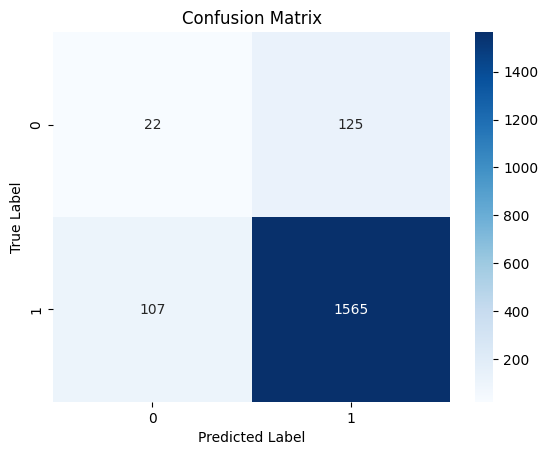

              precision    recall  f1-score   support

           0       0.17      0.15      0.16       147
           1       0.93      0.94      0.93      1672

    accuracy                           0.87      1819
   macro avg       0.55      0.54      0.55      1819
weighted avg       0.86      0.87      0.87      1819



In [45]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predicted_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, predicted_classes))